# Which Star Wars Movie is The Best?

An opinion poll team, [FiveThirtyEight](https://en.wikipedia.org/wiki/FiveThirtyEight), asked the question: **does the rest of America realize that "The Empire Strikes Back" is clearly the best of the bunch?** In order to answer this question the team created a survery from SurveyMonkey which recieved 835 respones total.

In the data we're analyzing there are several columns containing answers top questions about *Star Wars* movies. For some questions, the respondent had to check one or more boxes. Because of these the formatting of our data is a bit strange so there is going to be a lot of data restructuring in this project.

Data Dictionary:

 - `RespondentID` - An anonymized ID for the respondent (person taking the survey)
 - `Gender` - the respondent's gender
 - `Age` - the respondent's age
 - `Household Income` -  the respondent's income
 - `Education` - the respondent's education level
 - `Location (Census Region)` - the respondent's location
 - `Have you seen any of the 6 films in the Star Wars franchise?` - a Yes or No response
 - `Do you consider yourself to be a fan of the Star Wars film franchise?` - a Yes or No response


## Read in Data & Explore

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Read in data
star_wars = pd.read_csv(r'C:\Users\david\Desktop\star_wars.csv', encoding='ISO-8859-1')
star_wars

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,3292879998,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3.0,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
1,3292879538,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
2,3292765271,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1.0,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
3,3292763116,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
4,3292731220,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1181,3288388730,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,...,Very favorably,Han,No,NaN,Yes,Female,18-29,"$0 - $24,999",Some college or Associate degree,East North Central
1182,3288378779,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,4.0,...,Very favorably,I don't understand this question,No,NaN,Yes,Female,30-44,"$50,000 - $99,999",Bachelor degree,Mountain
1183,3288375286,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,No,Female,30-44,"$50,000 - $99,999",Bachelor degree,Middle Atlantic
1184,3288373068,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,4.0,...,Very favorably,Han,No,NaN,Yes,Female,45-60,"$100,000 - $149,999",Some college or Associate degree,East North Central


In [2]:
star_wars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1186 entries, 0 to 1185
Data columns (total 38 columns):
 #   Column                                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                                                         --------------  -----  
 0   RespondentID                                                                                                                                   1186 non-null   int64  
 1   Have you seen any of the 6 films in the Star Wars franchise?                                                                                   1186 non-null   object 
 2   Do you consider yourself to be a fan of the Star Wars film franchise?                                                                          836 non-null    object 
 3   Which of the following Star 

In [3]:
star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].value_counts(dropna=False)

Yes    936
No     250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64

In [4]:
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].value_counts(dropna=False)

Yes    552
NaN    350
No     284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64

## Convert String Values to Boolean

Converting string values to boolean values in a couple of our columns will help analyze the data later and overall make the data more readable.

In [5]:
# Change all specificed strings to specificed boolean value
yes_no = {'Yes':True, 'No':False}

star_wars['Have you seen any of the 6 films in the Star Wars franchise?'] = star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].map(yes_no)
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'] = star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].map(yes_no)

# Rename columns
star_wars = star_wars.rename(columns={
    'Which of the following Star Wars films have you seen? Please select all that apply.':'seen_1',
    'Unnamed: 4':'seen_2',
    'Unnamed: 5':'seen_3',
    'Unnamed: 6':'seen_4',
    'Unnamed: 7':'seen_5',
    'Unnamed: 8':'seen_6'})

# Check to see if it worked
star_wars.columns[3:9]

Index(['seen_1', 'seen_2', 'seen_3', 'seen_4', 'seen_5', 'seen_6'], dtype='object')

In [6]:
# Some of the strings in our rows have double spaces, so we'll transform them to single spaces
star_wars = star_wars.replace(r'\s+', ' ', regex=True)

# Map string values to boolean values using for loop
movies_map = {
    'Star Wars: Episode I The Phantom Menace': True,
    np.nan:False,
    'Star Wars: Episode II Attack of the Clones':True,
    'Star Wars: Episode III Revenge of the Sith':True,
    'Star Wars: Episode IV A New Hope':True,
    'Star Wars: Episode V The Empire Strikes Back':True,
    'Star Wars: Episode VI Return of the Jedi':True
    }
    
for col in star_wars.columns[3:9]:
    star_wars[col] = star_wars[col].map(movies_map) 

star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,3292879998,True,True,True,True,True,True,True,True,3.0,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
1,3292879538,False,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
2,3292765271,True,False,True,True,True,False,False,False,1.0,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
3,3292763116,True,True,True,True,True,True,True,True,5.0,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
4,3292731220,True,True,True,True,True,True,True,True,5.0,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


For the enxt six columns we're going to convert the data types from strings to floats and rename the column names. 

# REWRITE ^^^

In [61]:
pd.set_option('display.max_columns', None)

In [63]:
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)
star_wars = star_wars.rename(columns={
    'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.':'episode_I_score',
    'Unnamed: 10':'episode_II_score',
    'Unnamed: 11':'episode_III_score',
    'Unnamed: 12':'episode_IV_score',
    'Unnamed: 13':'episode_V_score',
    'Unnamed: 14':'episode_VI_score'
    })

star_wars[5:].head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,episode_I_score,episode_II_score,episode_III_score,episode_IV_score,episode_V_score,episode_VI_score,"Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.",Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
5,3292719380,True,True,True,True,True,True,True,True,1.0,4.0,3.0,6.0,5.0,2.0,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Neither favorably nor unfavorably (neutral),Very favorably,Neither favorably nor unfavorably (neutral),Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Neither favorably nor unfavorably (neutral),Very favorably,Han,Yes,No,Yes,Male,18-29,"$25,000 - $49,999",Bachelor degree,Middle Atlantic
6,3292684787,True,True,True,True,True,True,True,True,6.0,5.0,4.0,3.0,1.0,2.0,Very favorably,Very favorably,Somewhat favorably,Somewhat favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Somewhat favorably,Very favorably,Somewhat unfavorably,Somewhat favorably,Very favorably,Han,Yes,No,No,Male,18-29,NaN,High school degree,East North Central
7,3292663732,True,True,True,True,True,True,True,True,4.0,5.0,6.0,3.0,2.0,1.0,Very favorably,Somewhat favorably,Very favorably,Neither favorably nor unfavorably (neutral),Very favorably,Very unfavorably,Somewhat unfavorably,Neither favorably nor unfavorably (neutral),Somewhat favorably,Somewhat favorably,Somewhat favorably,Very unfavorably,Somewhat unfavorably,Very favorably,Han,No,NaN,Yes,Male,18-29,NaN,High school degree,South Atlantic
8,3292654043,True,True,True,True,True,True,True,True,5.0,4.0,6.0,2.0,1.0,3.0,Very favorably,Somewhat unfavorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Very favorably,Very favorably,Very favorably,Very favorably,Neither favorably nor unfavorably (neutral),Somewhat favorably,Very unfavorably,Somewhat unfavorably,Somewhat favorably,Han,No,NaN,No,Male,18-29,"$0 - $24,999",Some college or Associate degree,South Atlantic
9,3292640424,True,False,False,True,False,False,False,False,1.0,2.0,3.0,4.0,5.0,6.0,Neither favorably nor unfavorably (neutral),Very favorably,Very favorably,Very favorably,Very favorably,Somewhat unfavorably,Very favorably,Somewhat unfavorably,Somewhat unfavorably,Very favorably,Very favorably,Very favorably,Somewhat unfavorably,Very favorably,I don't understand this question,No,NaN,No,Male,18-29,"$25,000 - $49,999",Some college or Associate degree,Pacific


Columns `episode_I_score`, `episode_II_score`, `episode_III_score`, `episode_IV_score`, `episode_V_score` and `episode_VI_score` all indicate how much an individual liked each respective star wars movie. Where `1` is the most liked and `6` is the least liked.

In [8]:
# Find episode averages
star_wars[star_wars.columns[9:15]].mean()

episode_I_score      3.732934
episode_II_score     4.087321
episode_III_score    4.341317
episode_IV_score     3.272727
episode_V_score      2.513158
episode_VI_score     3.047847
dtype: float64

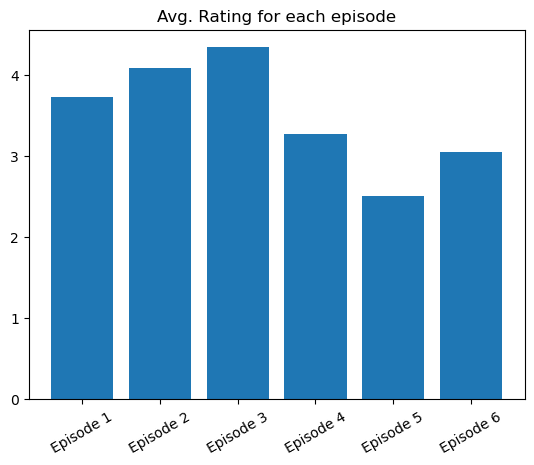

In [9]:
# Plot average score rating for each episode
plt.bar(range(6), star_wars[star_wars.columns[9:15]].mean())
plt.xticks(ticks=range(6), labels=['Episode 1', 'Episode 2', 'Episode 3', 'Episode 4', 'Episode 5', 'Episode 6'], rotation=30)
plt.title('Avg. Rating for each episode')
plt.show()

We can see that episode 5, or The Empire Strikes Back, was the highest rated movie. This is most likely due to the nostalgia of it as it was [one of the first](https://www.disney.com.au/movies/a-star-wars-timeline-of-every-movie-in-order-of-release#:~:text=Star%20Wars%3A%20A%20New%20Hope,the%20desert%20planet%20of%20Tatooine.) Star Wars movies produced.

In [10]:
# Total number of times a movie was watched
star_wars[star_wars.columns[3:9]].sum()

seen_1    673
seen_2    571
seen_3    550
seen_4    607
seen_5    758
seen_6    738
dtype: int64

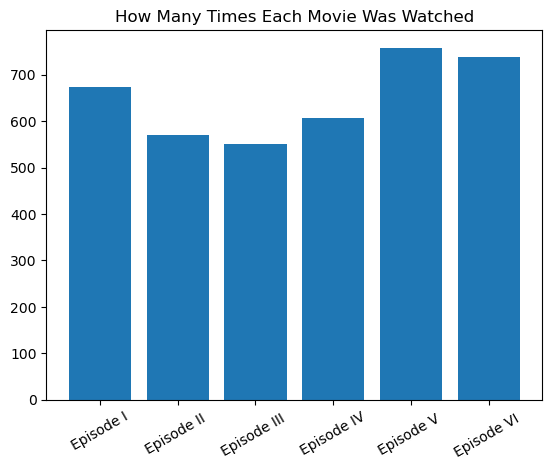

In [11]:
# Plot the total number of times a movie was watched
# bins.sort()

plt.bar(range(6),star_wars[star_wars.columns[3:9]].sum())
plt.xticks(range(6), labels=['Episode I', 'Episode II ',
                            'Episode III ', 'Episode IV',
                            'Episode V ', 'Episode VI '
                            ], rotation=30)
plt.title('How Many Times Each Movie Was Watched')
plt.show()

### DESCRIPTION HERE!!!

In [12]:
males = star_wars[star_wars["Gender"] == "Male"]
females = star_wars[star_wars["Gender"] == "Female"]

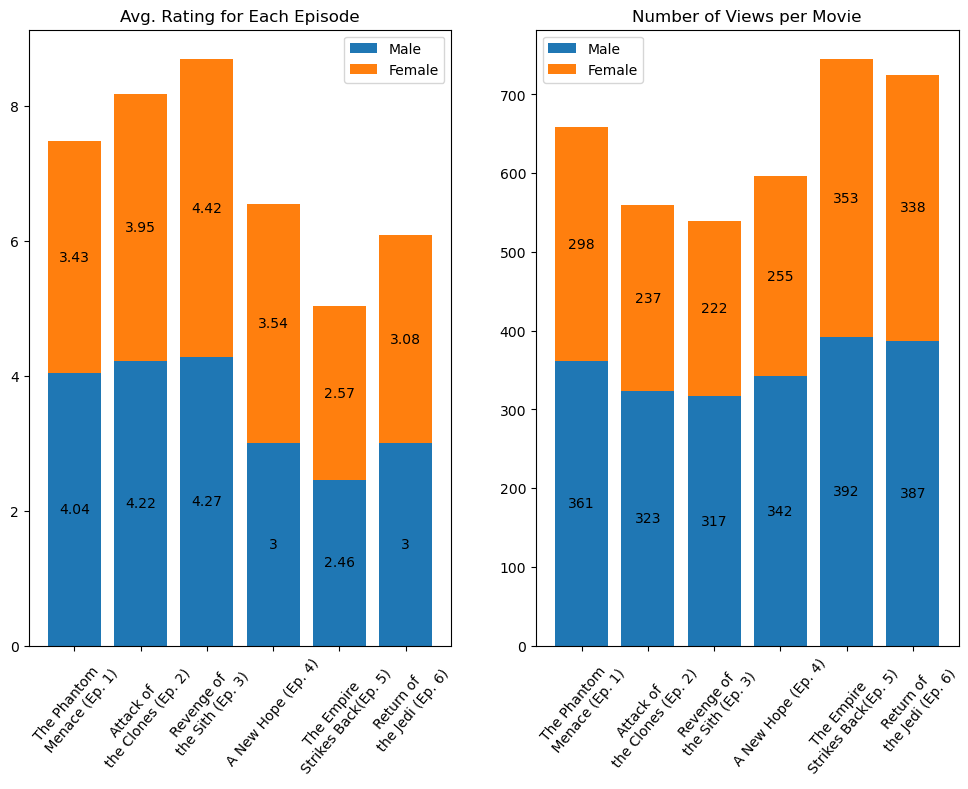

In [13]:
plt.figure(figsize=(12, 8))

plt.subplot(1,2,1)
p1 = plt.bar(range(6), males[males.columns[9:15]].mean().round(2))
p2 = plt.bar(range(6), females[females.columns[9:15]].mean().round(2), bottom=males[males.columns[9:15]].mean().round(2))
plt.legend(['Male','Female'])
plt.xticks(range(6), labels=['The Phantom \n Menace (Ep. 1)', 'Attack of \n the Clones (Ep. 2)',
                            'Revenge of \n the Sith (Ep. 3) ', 'A New Hope (Ep. 4)',
                            'The Empire \n Strikes Back(Ep. 5)', 'Return of \n the Jedi (Ep. 6)'
                            ], rotation=50)
plt.title('Avg. Rating for Each Episode')

plt.bar_label(p1, label_type='center')
plt.bar_label(p2, label_type='center')

plt.subplot(1,2,2)
p3 = plt.bar(range(6), males[males.columns[3:9]].sum())
p4 = plt.bar(range(6), females[females.columns[3:9]].sum(), bottom=males[males.columns[3:9]].sum())
plt.legend(['Male','Female'])
plt.xticks(range(6), labels=['The Phantom \n Menace (Ep. 1)', 'Attack of \n the Clones (Ep. 2)',
                            'Revenge of \n the Sith (Ep. 3) ', 'A New Hope (Ep. 4)',
                            'The Empire \n Strikes Back(Ep. 5)', 'Return of \n the Jedi (Ep. 6)'
                            ], rotation=50)
plt.title('Number of Views per Movie')

plt.bar_label(p3, label_type='center')
plt.bar_label(p4, label_type='center')

plt.show()

TypeError: bar() got multiple values for argument 'x'

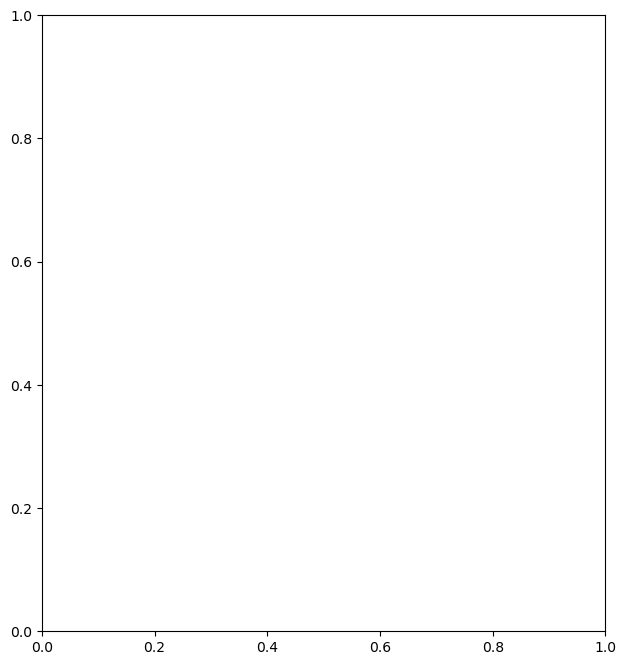

In [68]:
plt.figure(figsize=(16, 8))

a = np.arange(len(males.columns[9:15]))
y = 0.4

plt.subplot(1,2,1)
p1 = plt.bar(a, males[males.columns[9:15]].mean().round(2), x='index', label='Male', width=y)
p2 = plt.bar(a + y, females[females.columns[9:15]].mean().round(2), label='Female', width=y)
plt.xticks(range(6), labels=['The Phantom \n Menace (Ep. 1)', 'Attack of \n the Clones (Ep. 2)',
                            'Revenge of \n the Sith (Ep. 3) ', 'A New Hope (Ep. 4)',
                            'The Empire \n Strikes Back(Ep. 5)', 'Return of \n the Jedi (Ep. 6)'
                            ], rotation=50)
plt.title('Avg. Rating Per Movie')
plt.legend()

plt.bar_label(p1, label_type='center')
plt.bar_label(p2, label_type='center')

z = np.arange(len(females.columns[3:9]))

plt.subplot(1,2,2)
p3 = plt.bar(z, males[males.columns[3:9]].sum(), label='Male', width=y)
p4 = plt.bar(z + y, females[females.columns[3:9]].sum(), label='Female', width=y)
plt.legend(['Male','Female'])
plt.xticks(range(6), labels=['The Phantom \n Menace (Ep. 1)', 'Attack of \n the Clones (Ep. 2)',
                            'Revenge of \n the Sith (Ep. 3) ', 'A New Hope (Ep. 4)',
                            'The Empire \n Strikes Back(Ep. 5)', 'Return of \n the Jedi (Ep. 6)'
                            ], rotation=50)
plt.title('Views per Movie')

plt.bar_label(p3, label_type='center')
plt.bar_label(p4, label_type='center')

plt.show()

Text(0.5, 1.0, 'Avg. Rating for each episode')

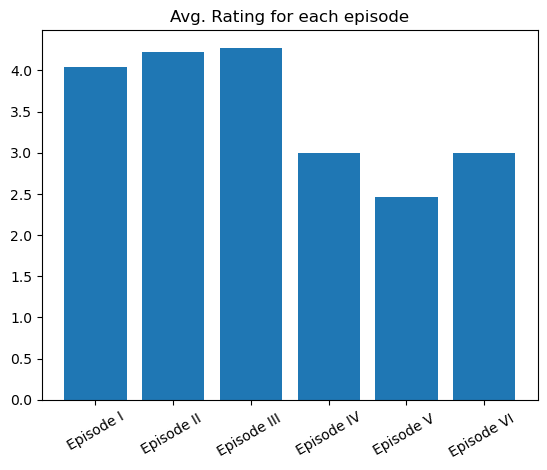

In [15]:
plt.bar(range(6), males[males.columns[9:15]].mean())
# plt.bar(range(6), females[females.columns[9:15]].mean())
plt.xticks(range(6), labels=['Episode I', 'Episode II ',
                            'Episode III ', 'Episode IV',
                            'Episode V ', 'Episode VI '
                            ], rotation=30)
plt.title('Avg. Rating for each episode')